# `ggplot2` Theming

There are a couple more things that we have to discuss when dealing with `ggplot2`. The first is themes and the second is coloring geoms with your own specified colors.

Again, we will be working with `congress-terms.csv`, which we used in Module 2.

In [1]:
frame <- read.csv('/dsa/data/all_datasets/congress-terms.csv')
head(frame)

congress,chamber,bioguide,firstname,middlename,lastname,suffix,birthday,state,party,incumbent,termstart,age
<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>
80,house,M000112,Joseph,Jefferson,Mansfield,,1861-02-09,TX,D,Yes,1/3/47,85.9
80,house,D000448,Robert,Lee,Doughton,,1863-11-07,NC,D,Yes,1/3/47,83.2
80,house,S000001,Adolph,Joachim,Sabath,,1866-04-04,IL,D,Yes,1/3/47,80.7
80,house,E000023,Charles,Aubrey,Eaton,,1868-03-29,NJ,R,Yes,1/3/47,78.8
80,house,L000296,William,,Lewis,,1868-09-22,KY,R,No,1/3/47,78.3
80,house,G000017,James,A.,Gallagher,,1869-01-16,PA,R,No,1/3/47,78.0


## Themes

We are going to be reading in the packages that we will be using for this exercise. Some of them are new and the reason for that is that we are going to show you how to create your own theme. But first, let's talk about themes...

The [theme](https://ggplot2.tidyverse.org/reference/index.html#section-themes) is the non-data components of the plot - things like the background, the gridlines, the colors of non-data objects, etc. There are multiple built in themes and we will take a look at them now. 

Run the next few cells...

In [2]:
library(ggplot2); library(scales); library(grid); library(RColorBrewer); library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



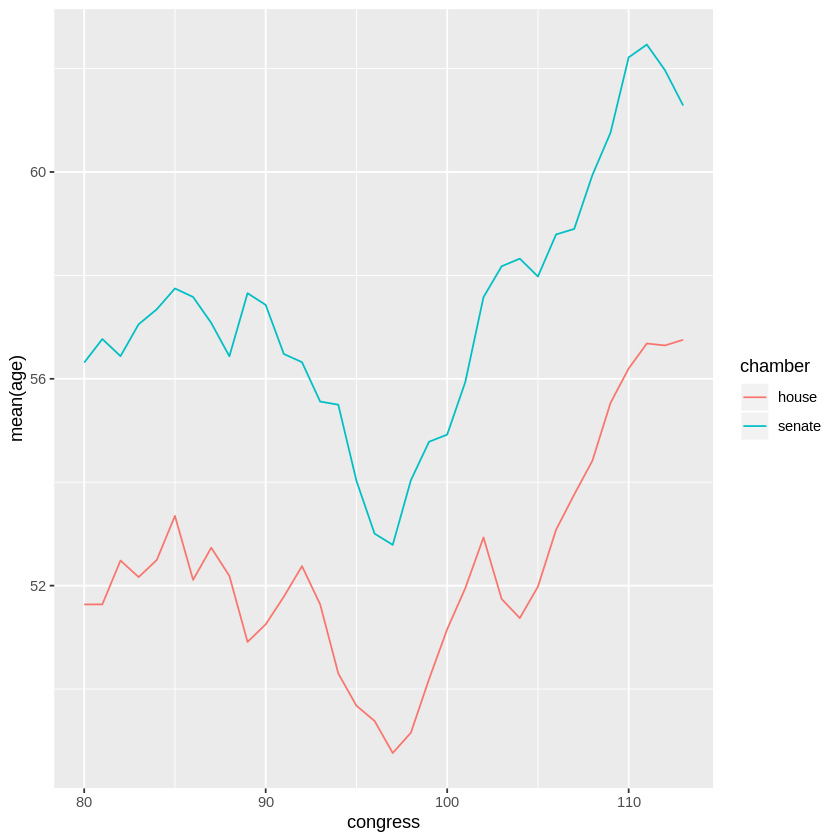

In [3]:
# create a data frame of the mean age per congress per chamber
sum_frame <-
frame %>%
    group_by(congress,chamber) %>%
    summarize(mean(age),sd(age))

plot1 <-ggplot(data = sum_frame,aes(x = congress, y = `mean(age)`, colour = chamber)) +
    geom_line()

plot1 # default theme

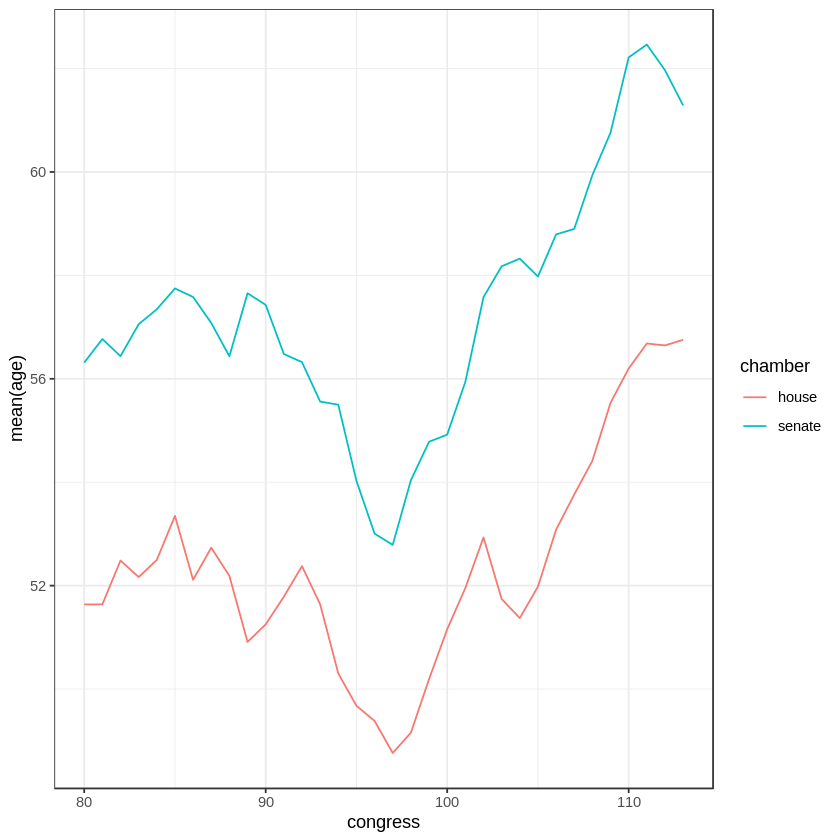

In [4]:
plot1 + theme_bw()

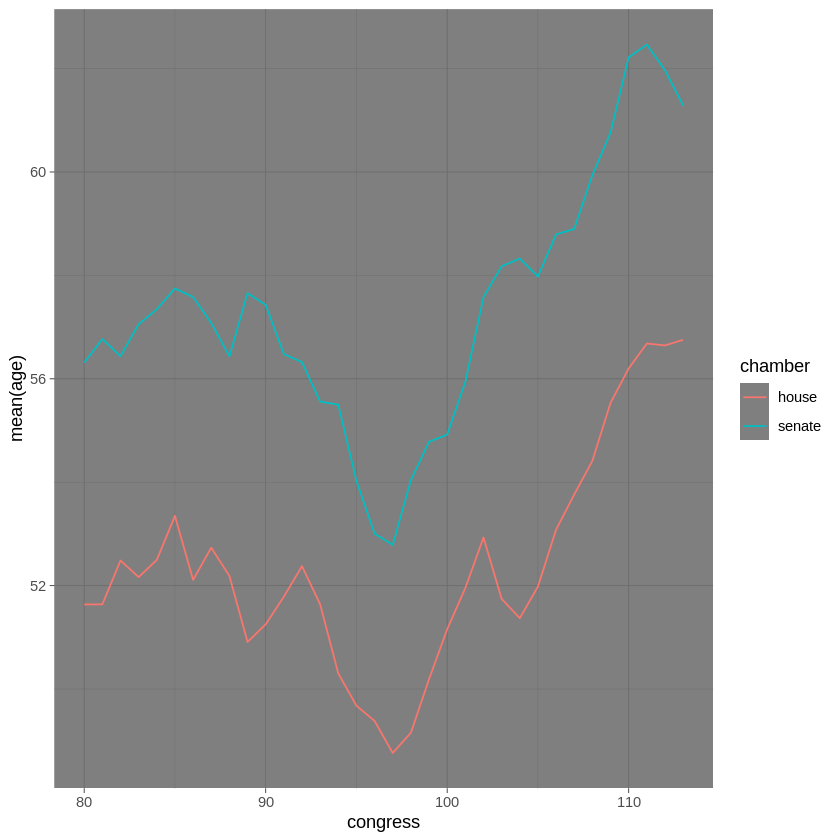

In [5]:
plot1 + theme_dark()

See what happened? The background color changed depending on the theme that we used. Also, notice how we can name plots. This plot was named `plot1` and it allows us to easily keep a base layer and add other aesthetic components or themes to a single plot. That's how we were able to call `plot1 + theme_bw()` and `plot1 + theme_dark()`. 

Now we can also create a theme of our own. This is where some of the other packages come into play, such as RColorBrewer, which provides us nice color palettes to work with to make our plots more aesthetically pleasing. We will call this `my_theme`.

In [6]:
my_theme <- function() {
      
    # Generate the colors for the chart procedurally with RColorBrewer
    palette <- brewer.pal("Greys", n=9) # create a palette of shades of grey 
    color.background = palette[1] # background plot color
    color.grid.major = palette[3] 
    color.grid.minor = palette[2]
    color.axis.text = palette[6] # text color 
    color.axis.title = palette[7]
    color.title = palette[9]

    # Begin construction of chart
    theme_bw(base_size=9) +

    # Set the entire chart region to a white color
    theme(panel.background=element_rect(fill=color.background, color=color.background)) +
    theme(plot.background=element_rect(fill=color.background, color=color.background)) +
    theme(panel.border=element_rect(color=color.background)) +

    # Format the grid
    theme(panel.grid.major=element_line(color=color.grid.major,size=.25)) +
    theme(panel.grid.minor=element_blank()) +
    theme(axis.ticks=element_blank()) +

    # Format the legend, but hide by default
    theme(legend.position="bottom") +
    theme(legend.background = element_rect(fill=color.background)) +
    theme(legend.text = element_text(size=7,color=color.axis.title)) +

    # Set title and axis labels, and format these and tick marks
    theme(plot.title=element_text(color=color.title, size=10, vjust=1.25)) +
    theme(axis.text.x=element_text(size=7,color=color.axis.text)) +
    theme(axis.text.y=element_text(size=7,color=color.axis.text)) +
    theme(axis.title.x=element_text(size=8,color=color.axis.title, vjust=0)) +
    theme(axis.title.y=element_text(size=8,color=color.axis.title, vjust=1.25)) +
    
    # Set facet attributes
    theme(strip.background = element_rect(fill=color.background, colour = color.background)) +
    theme(strip.text = element_text(size = 15, colour = color.axis.text)) +

    # Plot margins
    theme(plot.margin = unit(c(0.35, 0.2, 0.3, 0.35), "cm"))
}

Now it is as simple as calling `plot1 + my_theme()`. Let's do that...

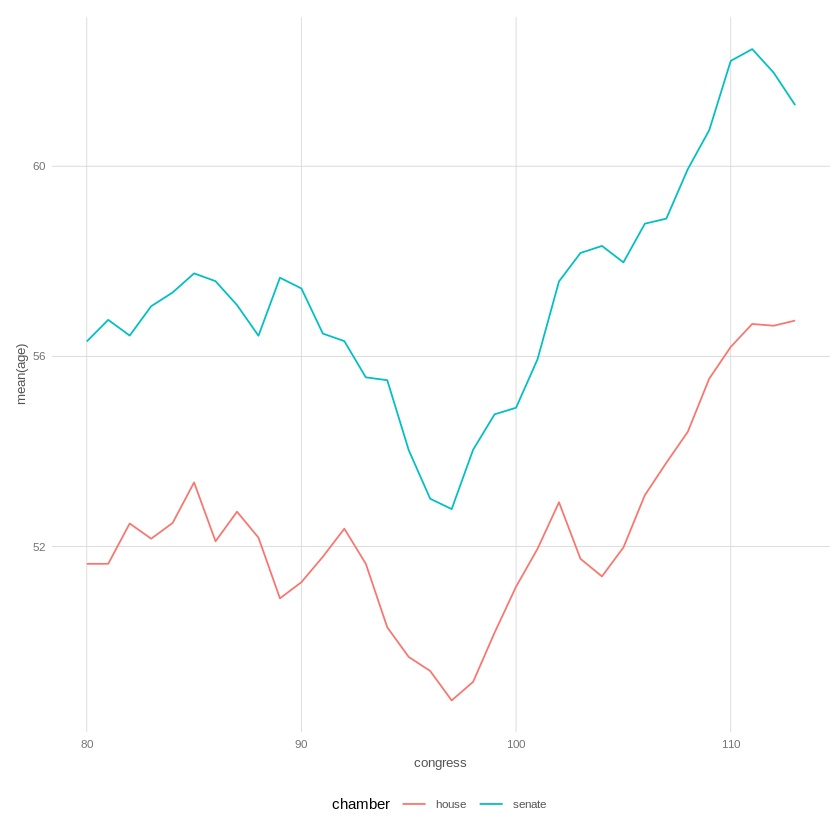

In [7]:
plot1 + my_theme()

## Custom Colors

`ggplot2` does a good job at providing default colors, like the red and blue above. But sometimes we may want to use our own colors, be it to stick with your company's color palette, or the information is better represented with specific colors. For example, you will often see graphs depicting Republican data as red, while those dealing with Democratic data are blue. 

There are different functions to specify color depending on what type of aesthetic we are trying to customize. Take the example below, the function `scale_colour_manual()` is used to change the `colour` aesthetic. If we had specified `fill` as an aesthetic then the function would be `scale_fill_manual()`.

In [2]:
plot1 + scale_colour_manual(values=c('#00ff00','#ff00ff')) + my_theme()

ERROR: Error in eval(expr, envir, enclos): object 'plot1' not found


Keep in mind that we are still visualizing `plot1`. In this case the ` scale_colour_manual()` took one parameter, `values`, in which we passed a list of `html` colors for each category (house and senate) of the `colour` aesthetic.  You can pick some `html` colors [here](http://www.w3schools.com/colors/colors_picker.asp). 

# Save your notebook, then `File > Close and Halt`